#### Pizza Delivery Analysis

This repository presents an Exploratory Data Analysis (EDA) of a pizza delivery dataset. The dataset contains comprehensive information on individual pizza orders, including delivery times, distances, payment methods, pizza characteristics, and external factors like traffic and peak hours.

The workflow of this notebook includes:

1. Data import and exploration
2. Data cleaning and preparation
3. Exploratory Data Analysis (EDA)
4. Preparation for visualization and reporting (e.g., Tableau)

> Tools used: Python (Pandas, NumPy, Matplotlib/Seaborn), Tableau

In [2]:
import pandas as pd

# Load the original file
file_path = "Enhanced_pizza_sales.csv"
df_original = pd.read_csv(file_path, sep=';')

# Fix inconsistent restaurant name
df_original['Restaurant Name'] = df_original['Restaurant Name'].replace({
    "Marco’s Pizza": "Marco's Pizza"
})

# Overwrite the original file with the updated version
df_original.to_csv(file_path, sep=';', index=False)


In [3]:
# STEP 1.1: Data Import and Cleaning
# -------------------------------------------
# This script imports pizza sales data from a CSV file (semicolon-separated),
# converts numerical columns from comma to dot decimal format, and saves a
# cleaned version of the file. The resulting DataFrame is ready for analysis.

# Reload the corrected file
df = pd.read_csv(file_path, sep=';')

# Convert decimal commas to dots and cast to float
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = df[col].str.replace(',', '.', regex=False).astype(float)
        except:
            continue  # Skip conversion if not possible

# Save cleaned file with corrected decimal format
clean_file_path = "Enhanced_pizza_sales_clean_decimal.csv"
df.to_csv(clean_file_path, sep=';', index=False)

# (Optional) Reload cleaned file for analysis
df = pd.read_csv(clean_file_path, sep=';')


In [4]:
# 1. Check for null values
null_count = df['Delay (min)'].isnull().sum()
print(f"Número de valores nulos en 'Delay (min)': {null_count}")

# 2. Check for empty string values ""
empty_string_count = (df['Delay (min)'] == '').sum()
print(f"Número de valores vacíos (\"\") en 'Delay (min)': {empty_string_count}")

# 3. Check for non-numeric text values
non_numeric_values = df[~df['Delay (min)'].apply(lambda x: pd.to_numeric(x, errors='coerce')).notnull()]
print(f"Número de valores no numéricos en 'Delay (min)': {non_numeric_values.shape[0]}")


Número de valores nulos en 'Delay (min)': 0
Número de valores vacíos ("") en 'Delay (min)': 0
Número de valores no numéricos en 'Delay (min)': 0


In [5]:
print(df['Restaurant Name'].unique())

["Domino's" 'Pizza Hut' "Papa John's" 'Little Caesars' "Marco's Pizza"]


In [6]:
# STEP 1.2: Data Import and Initial Exploration
# -------------------------------------------
# This script imports inspection data from a CSV file and performs basic
# exploration to understand the structure and quality of the dataset.

import pandas as pd

# Load the cleaned dataset (with decimal points instead of commas)
file_path = "Enhanced_pizza_sales_clean_decimal.csv"
df = pd.read_csv(file_path, sep=';')

# Display basic info
print("Shape of the dataset:", df.shape)
print("\nColumn names:\n", df.columns.tolist())
print("\nData types and non-null values:\n")
print(df.info())

# Display column names in a vertical list
print("Column names:\n")
print(pd.Series(df.columns))

# Show sample rows
print("\nSample rows:\n")
print(df.head())

# Describe numerical and categorical data
print("\nStatistical summary:\n")
print(df.describe(include='all'))



Shape of the dataset: (1004, 26)

Column names:
 ['Order ID', 'Restaurant Name', 'Location', 'Order Time', 'Delivery Time', 'Delivery Duration (min)', 'Pizza Size', 'Pizza Type', 'Toppings Count', 'Distance (km)', 'Traffic Level', 'Payment Method', 'Is Peak Hour', 'Is Weekend', 'Delivery Efficiency (min/km)', 'Topping Density', 'Order Month', 'Payment Category', 'Estimated Duration (min)', 'Delay (min)', 'Is Delayed', 'Pizza Complexity', 'Traffic Impact', 'Order Hour', 'Restaurant Avg Time', 'Price ($)']

Data types and non-null values:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Order ID                      1004 non-null   object 
 1   Restaurant Name               1004 non-null   object 
 2   Location                      1004 non-null   object 
 3   Order Time                    1004 non-null   obj

In [7]:
df.shape

(1004, 26)

In [8]:
df.head(5)

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,Distance (km),...,Order Month,Payment Category,Estimated Duration (min),Delay (min),Is Delayed,Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time,Price ($)
0,ORD011,Domino's,"San Francisco, CA",11/01/2024 17:30,11/01/2024 17:50,20,Large,Veg,4,4.0,...,January,Online,9.6,10.4,FALSO,12,1,17,30.259434,13.7
1,ORD586,Domino's,"San Francisco, CA",22/05/2025 20:15,22/05/2025 21:00,45,Large,Veg,4,9.0,...,May,Offline,21.6,23.4,VERDADERO,12,3,20,30.259434,13.7
2,ORD616,Domino's,"San Francisco, CA",21/06/2025 20:15,21/06/2025 21:00,45,Large,Veg,4,9.0,...,June,Offline,21.6,23.4,VERDADERO,12,3,20,30.259434,13.7
3,ORD204,Pizza Hut,"Houston, TX",19/07/2024 19:45,19/07/2024 20:10,25,XL,Cheese Burst,5,6.0,...,July,Online,14.4,10.6,FALSO,20,3,19,29.948454,17.5
4,ORD224,Pizza Hut,"Houston, TX",08/08/2024 19:45,08/08/2024 20:10,25,XL,Cheese Burst,5,6.0,...,August,Online,14.4,10.6,FALSO,20,3,19,29.948454,17.5


In [9]:
df.describe()

,Delivery Duration (min),Toppings Count,Distance (km),Delivery Efficiency (min/km),Topping Density,Estimated Duration (min),Delay (min),Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time,Price ($)
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,29.492032,3.362550,4.945618,6.397006,0.714684,11.869482,17.622550,9.468127,2.049801,18.691235,29.492032,12.649004
std,7.753103,1.135853,1.951463,1.562573,0.203020,4.683510,3.964289,6.233731,0.775696,1.529466,0.859941,3.218096
min,15.000000,1.000000,2.000000,4.166667,0.266667,4.800000,9.000000,1.000000,1.000000,12.000000,26.666667,7.100000
25%,25.000000,3.000000,3.500000,5.000000,0.600000,8.400000,15.200000,6.000000,1.000000,18.000000,28.844221,10.600000
50%,30.000000,3.000000,4.500000,6.000000,0.666667,10.800000,17.800000,6.000000,2.000000,19.000000,29.948454,11.600000
75%,30.000000,4.000000,6.000000,7.142857,0.833333,14.400000,20.400000,12.000000,3.000000,20.000000,30.259434,14.700000
max,50.000000,5.000000,10.000000,12.500000,1.500000,24.000000,30.080000,20.000000,3.000000,21.000000,30.286458,18.500000


In [10]:
# STEP 2: Check missing values
# -------------------------------------------

print("\nMissing values per column:\n")
print(df.isnull().sum().sort_values(ascending=False))


Missing values per column:

Order ID                        0
Restaurant Name                 0
Location                        0
Order Time                      0
Delivery Time                   0
Delivery Duration (min)         0
Pizza Size                      0
Pizza Type                      0
Toppings Count                  0
Distance (km)                   0
Traffic Level                   0
Payment Method                  0
Is Peak Hour                    0
Is Weekend                      0
Delivery Efficiency (min/km)    0
Topping Density                 0
Order Month                     0
Payment Category                0
Estimated Duration (min)        0
Delay (min)                     0
Is Delayed                      0
Pizza Complexity                0
Traffic Impact                  0
Order Hour                      0
Restaurant Avg Time             0
Price ($)                       0
dtype: int64


In [11]:

# STEP 3: Check for duplicate rows
# -------------------------------------------
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Number of duplicate rows:
0


### Inspect Key Variables
Objective: Explore key variables individually to better understand their values, data quality, and possible cleaning needs.

In [12]:
# STEP 4 - Inspect Key Variables
# First 10 Rows of the Location

print(df["Location"].head(10))


0    San Francisco, CA
1    San Francisco, CA
2    San Francisco, CA
3          Houston, TX
4          Houston, TX
5        Las Vegas, NV
6      Bakersfield, CA
7            Miami, FL
8            Miami, FL
9            Miami, FL
Name: Location, dtype: object


In [13]:
# Inspect the "Topping Density" column

print("\nRandom 10 values from 'Topping Density' column:\n")
print(df["Topping Density"].sample(10, random_state=1))


Random 10 values from 'Topping Density' column:

954    0.400000
613    0.400000
597    0.727273
372    0.500000
754    0.600000
986    0.571429
974    0.400000
772    0.600000
825    1.000000
49     0.400000
Name: Topping Density, dtype: float64


In [14]:
# Inspect the "Pizza Complexity" column

print("\nRandom 10 values from 'Pizza Complexity' column:\n")
print(df["Pizza Complexity"].sample(10, random_state=1))


Random 10 values from 'Pizza Complexity' column:

954     1
613     1
597    12
372     4
754     6
986     4
974    12
772     6
825    20
49     12
Name: Pizza Complexity, dtype: int64


##### STEP 5: Missing Values Treatment
##### --------------------------------
##### There are no missing values

In [15]:
print(df.isnull().sum().sort_values(ascending=False))

Order ID                        0
Restaurant Name                 0
Location                        0
Order Time                      0
Delivery Time                   0
Delivery Duration (min)         0
Pizza Size                      0
Pizza Type                      0
Toppings Count                  0
Distance (km)                   0
Traffic Level                   0
Payment Method                  0
Is Peak Hour                    0
Is Weekend                      0
Delivery Efficiency (min/km)    0
Topping Density                 0
Order Month                     0
Payment Category                0
Estimated Duration (min)        0
Delay (min)                     0
Is Delayed                      0
Pizza Complexity                0
Traffic Impact                  0
Order Hour                      0
Restaurant Avg Time             0
Price ($)                       0
dtype: int64


##### STEP 6: Create the City and State columns
##### --------------------------------
##### Taken from the Location column

In [16]:
# Split the 'Location' column into 'City' and 'State'
df[['City', 'State']] = df['Location'].str.split(', ', expand=True)

# Save the result to a new file
df.to_csv("Enhanced_pizza_sales_with_city_state.csv", sep=';', index=False)

# # Check the first rows
print(df[['Location', 'City', 'State']].head())


            Location           City State
0  San Francisco, CA  San Francisco    CA
1  San Francisco, CA  San Francisco    CA
2  San Francisco, CA  San Francisco    CA
3        Houston, TX        Houston    TX
4        Houston, TX        Houston    TX


In [17]:
# Split the 'Location' column into 'City' and 'State'
df[['City', 'State']] = df['Location'].str.split(', ', expand=True)

# Make sure values are numeric
df['Delivery Efficiency (min/km)'] = pd.to_numeric(df['Delivery Efficiency (min/km)'], errors='coerce')

# Add new column: Delivery Efficiency (km/min)
df['Delivery Efficiency (km/min)_New'] = 1 / df['Delivery Efficiency (min/km)']

# Normalize text to lowercase and map to booleans
df['Is Peak Hour'] = df['Is Peak Hour'].str.lower().map({'verdadero': True, 'falso': False})
df['Is Weekend'] = df['Is Weekend'].str.lower().map({'verdadero': True, 'falso': False})
df['Is Delayed'] = df['Is Delayed'].str.lower().map({'verdadero': True, 'falso': False})

# Then convert to integers (1 = True, 0 = False)
df['Is Peak Hour_New'] = df['Is Peak Hour'].astype(int)
df['Is Weekend_New'] = df['Is Weekend'].astype(int)
df['Is Delayed_New'] = df['Is Delayed'].astype(int)

# Add new column: Traffic Level (numeric) ("Traffic Level_New")
traffic_map = {'Low': 1, 'Medium': 2, 'High': 3}
df['Traffic Level_New'] = df['Traffic Level'].map(traffic_map)

# Map pizza sizes to numeric values
pizza_size_map = {
    'Small': 1,
    'Medium': 2,
    'Large': 3,
    'XL': 4
}

# Create new column
df['Pizza Size_New'] = df['Pizza Size'].map(pizza_size_map)


# Save file with ';' as separator
df.to_csv("Pizza_sales_with_city_state_and_new_col.csv", sep=';', index=False)

# Check first rows of new columns
print(df[[
    'Location', 'City', 'State',
    'Delivery Efficiency (min/km)', 'Delivery Efficiency (km/min)_New',
    'Is Peak Hour', 'Is Peak Hour_New',
    'Is Weekend', 'Is Weekend_New',
    'Is Delayed', 'Is Delayed_New',
    'Traffic Level', 'Traffic Level_New',
    'Pizza Size', 'Pizza Size_New'
]].head())


            Location           City State  Delivery Efficiency (min/km)  \
0  San Francisco, CA  San Francisco    CA                      5.000000   
1  San Francisco, CA  San Francisco    CA                      5.000000   
2  San Francisco, CA  San Francisco    CA                      5.000000   
3        Houston, TX        Houston    TX                      4.166667   
4        Houston, TX        Houston    TX                      4.166667   

   Delivery Efficiency (km/min)_New  Is Peak Hour  Is Peak Hour_New  \
0                              0.20         False                 0   
1                              0.20          True                 1   
2                              0.20          True                 1   
3                              0.24          True                 1   
4                              0.24          True                 1   

   Is Weekend  Is Weekend_New  Is Delayed  Is Delayed_New Traffic Level  \
0       False               0       False      

In [18]:
print(df['Pizza Size'].unique())


['Large' 'XL' 'Medium' 'Small']


In [19]:
df.head(3)

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,Distance (km),...,Restaurant Avg Time,Price ($),City,State,Delivery Efficiency (km/min)_New,Is Peak Hour_New,Is Weekend_New,Is Delayed_New,Traffic Level_New,Pizza Size_New
0,ORD011,Domino's,"San Francisco, CA",11/01/2024 17:30,11/01/2024 17:50,20,Large,Veg,4,4.0,...,30.259434,13.7,San Francisco,CA,0.2,0,0,0,1,3
1,ORD586,Domino's,"San Francisco, CA",22/05/2025 20:15,22/05/2025 21:00,45,Large,Veg,4,9.0,...,30.259434,13.7,San Francisco,CA,0.2,1,0,1,3,3
2,ORD616,Domino's,"San Francisco, CA",21/06/2025 20:15,21/06/2025 21:00,45,Large,Veg,4,9.0,...,30.259434,13.7,San Francisco,CA,0.2,1,1,1,3,3


In [20]:
# Show all columns without truncation
pd.set_option('display.max_columns', None)

# Display first 3 full rows
print(df.head(3))


  Order ID Restaurant Name           Location        Order Time  \
0   ORD011        Domino's  San Francisco, CA  11/01/2024 17:30   
1   ORD586        Domino's  San Francisco, CA  22/05/2025 20:15   
2   ORD616        Domino's  San Francisco, CA  21/06/2025 20:15   

      Delivery Time  Delivery Duration (min) Pizza Size Pizza Type  \
0  11/01/2024 17:50                       20      Large        Veg   
1  22/05/2025 21:00                       45      Large        Veg   
2  21/06/2025 21:00                       45      Large        Veg   

   Toppings Count  Distance (km) Traffic Level Payment Method  Is Peak Hour  \
0               4            4.0           Low            UPI         False   
1               4            9.0          High           Cash          True   
2               4            9.0          High           Cash          True   

   Is Weekend  Delivery Efficiency (min/km)  Topping Density Order Month  \
0       False                           5.0         1.000

In [21]:
# Remove 'show all columns without truncation' option

pd.reset_option('display.max_columns')


### Correlation graph between numerical variables

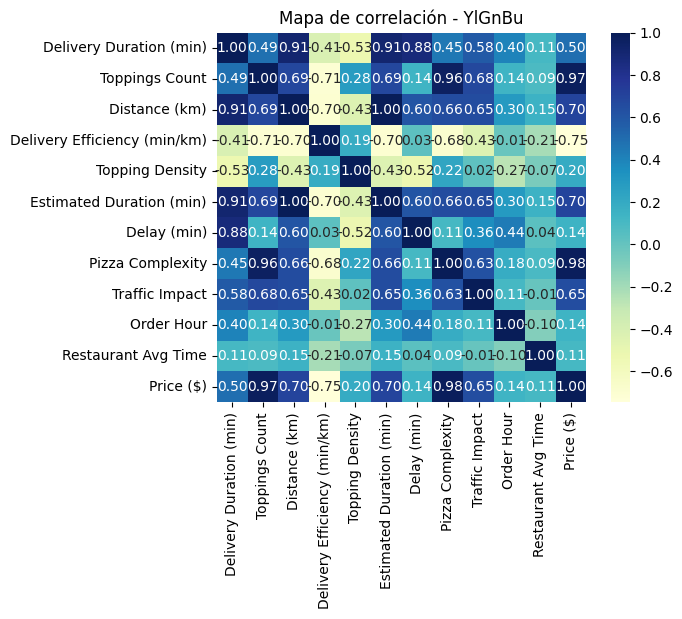

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Upload CSV separated by semicolon
df = pd.read_csv("Enhanced_pizza_sales.csv", sep=';')

# Convert columns with decimal point to real numbers
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = df[col].str.replace(',', '.', regex=False).astype(float)
        except ValueError:
            continue

# Calculate correlation matrix
corr_matrix = df.select_dtypes(include='number').corr()

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f", square=True)
plt.title('Mapa de correlación - YlGnBu')
plt.show()




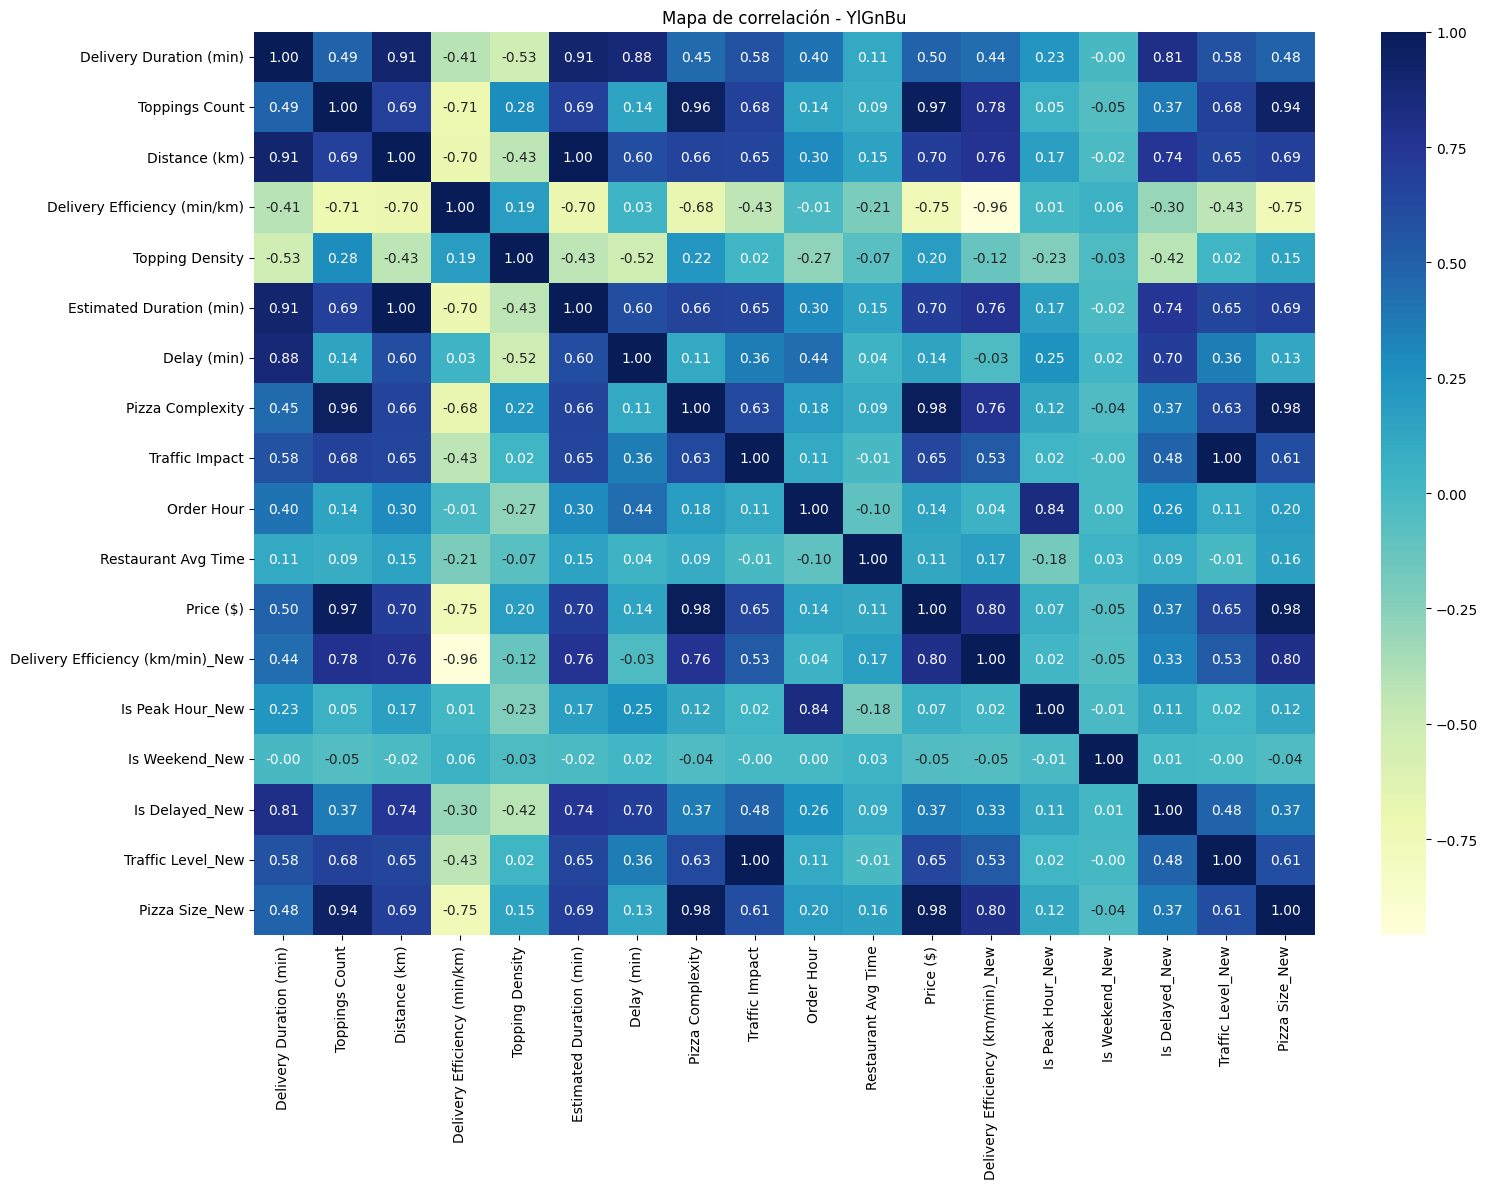

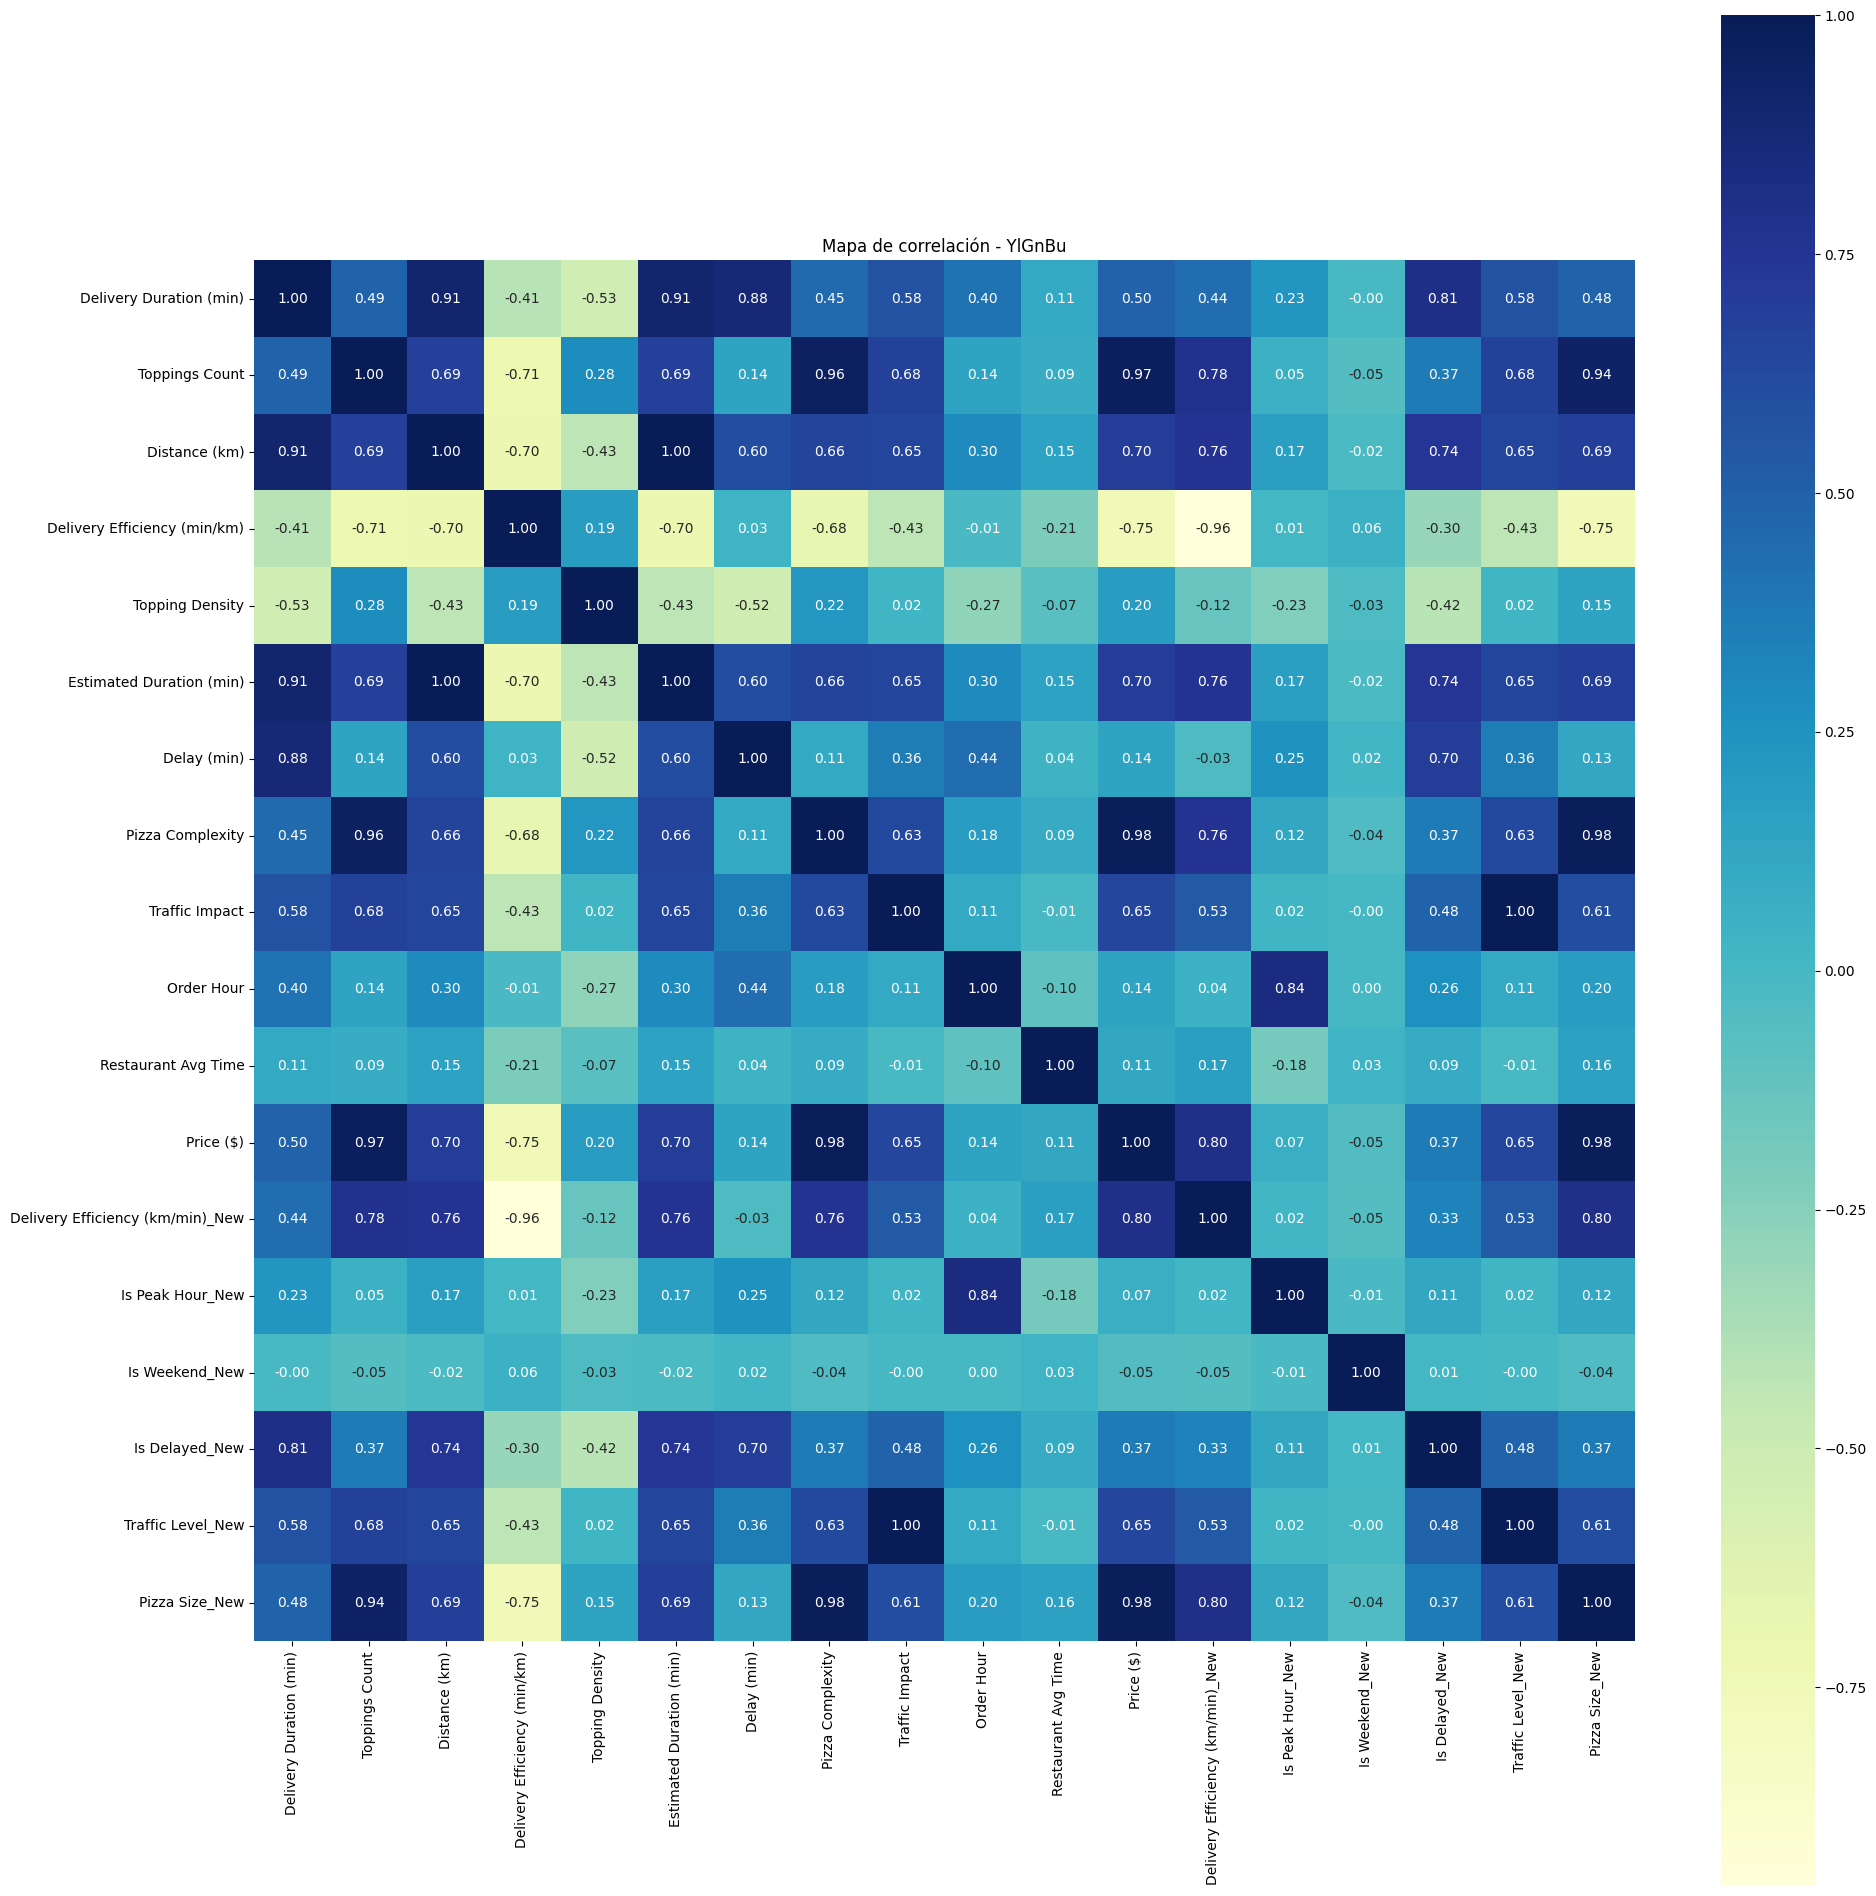

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Upload CSV separated by semicolon
df = pd.read_csv("Pizza_sales_with_city_state_and_new_col.csv", sep=';')

# Convert columns with decimal point to real numbers
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            df[col] = df[col].str.replace(',', '.', regex=False).astype(float)
        except ValueError:
            continue

# Calculate correlation matrix
corr_matrix = df.select_dtypes(include='number').corr()

# Create heatmap
plt.figure(figsize=(16, 12))  # Ajusta el tamaño a tu gusto
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Mapa de correlación - YlGnBu')
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f", square=True)
plt.title('Mapa de correlación - YlGnBu')
plt.tight_layout()
plt.show()


In [24]:
# Make sure Location values are strings
df["Location"] = df["Location"].astype(str)

# Split Location into City and State
df[["City", "State"]] = df["Location"].str.split(", ", expand=True)

# Get unique lists
unique_cities = sorted(df["City"].dropna().unique())
unique_states = sorted(df["State"].dropna().unique())

# Show results
print("Ciudades únicas:")
print(unique_cities)
print("\nAbreviaturas de estados únicas:")
print(unique_states)

Ciudades únicas:
['Akron', 'Albuquerque', 'Anaheim', 'Arlington', 'Atlanta', 'Aurora', 'Austin', 'Bakersfield', 'Baltimore', 'Baton Rouge', 'Boise', 'Boston', 'Chandler', 'Charlotte', 'Chicago', 'Chula Vista', 'Cleveland', 'Columbus', 'Corpus Christi', 'Dallas', 'Denver', 'Detroit', 'Durham', 'El Paso', 'Fort Wayne', 'Fort Worth', 'Fresno', 'Garland', 'Glendale', 'Henderson', 'Honolulu', 'Houston', 'Indianapolis', 'Irving', 'Jacksonville', 'Jersey City', 'Kansas City', 'Laredo', 'Las Vegas', 'Lexington', 'Lincoln', 'Long Beach', 'Los Angeles', 'Louisville', 'Lubbock', 'Madison', 'Memphis', 'Mesa', 'Miami', 'Milwaukee', 'Minneapolis', 'Nashville', 'New Orleans', 'New York', 'Newark', 'Norfolk', 'Oakland', 'Oklahoma City', 'Omaha', 'Orlando', 'Philadelphia', 'Phoenix', 'Plano', 'Portland', 'Raleigh', 'Reno', 'Riverside', 'Sacramento', 'San Antonio', 'San Diego', 'San Francisco', 'San Jose', 'Scottsdale', 'Seattle', 'St. Louis', 'St. Paul', 'St. Petersburg', 'Stockton', 'Tampa', 'Tucson',